# Installing PySpecKit

In [43]:
pip install pyspeckit

Note: you may need to restart the kernel to use updated packages.


# Example code from PySpecKit Documentation

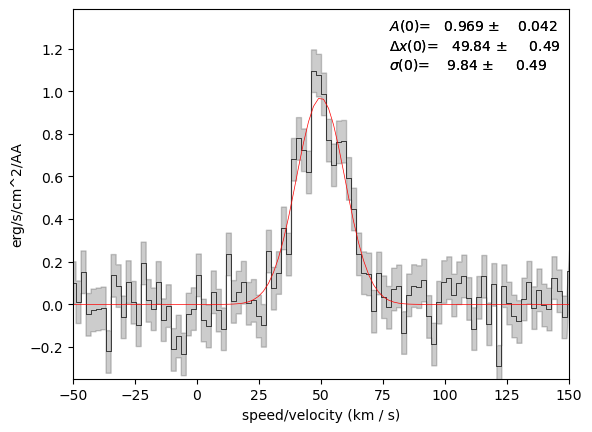

In [47]:
import numpy as np
import pyspeckit

xaxis = np.linspace(-50,150,100)
sigma = 10.
center = 50.
synth_data = np.exp(-(xaxis-center)**2/(sigma**2 * 2.))

# Add noise
stddev = 0.1
noise = np.random.randn(xaxis.size)*stddev
error = stddev*np.ones_like(synth_data)
data = noise+synth_data

# this will give a "blank header" warning, which is fine
sp = pyspeckit.Spectrum(data=data, error=error, xarr=xaxis,
                        xarrkwargs={'unit':'km/s'},
                        unit='erg/s/cm^2/AA')

sp.plotter()

# Fit with automatic guesses
sp.specfit(fittype='gaussian')

# Fit with input guesses
# The guesses initialize the fitter
# This approach uses the 0th, 1st, and 2nd moments
amplitude_guess = data.max()
center_guess = (data*xaxis).sum()/data.sum()
width_guess = (data.sum() / amplitude_guess / (2*np.pi))**0.5
guesses = [amplitude_guess, center_guess, width_guess]
sp.specfit(fittype='gaussian', guesses=guesses)

sp.plotter(errstyle='fill')
sp.specfit.plot_fit()


# Visualizing our Data

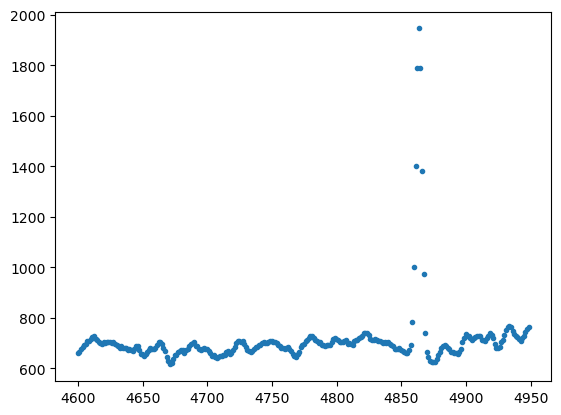

In [49]:
import numpy as np
import pyspeckit as pysk
import matplotlib.pyplot as plt

data_set = np.genfromtxt("ngc253_hb.tab")

x = data_set[:,0]
y = data_set[:,1]

fig, ax = plt.subplots()
ax.scatter(x, y, marker =".")

# Combining example code with our data to create gaussian fit

Error 'FigureManagerBase' object has no attribute 'key_press' was raised when trying to connect the key_press handler.  Please file an issue on github.  You may try a different matplotlib backend as a temporary workaround


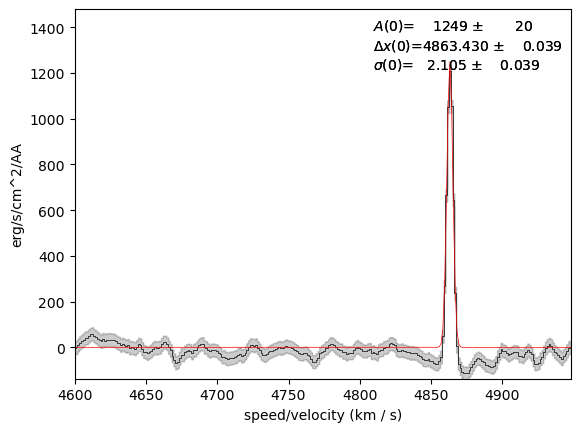

In [113]:
xaxis = x
data = y

# noise
n1 = data[:208]
n2 = data[216:]
noise = np.concatenate([n1, n2])
stddev = np.std(noise)
#print(stddev)
error = stddev*np.ones_like(data)
d = data #+noise

# this will give a "blank header" warning, which is fine
sp = pysk.Spectrum(data=d, error=error, xarr=xaxis,
                        xarrkwargs={'unit':'km/s'},
                        unit='erg/s/cm^2/AA')

sp.plotter()
sp.baseline()

# Fit with automatic guesses
sp.specfit(fittype='gaussian')

# Fit with input guesses
# The guesses initialize the fitter
# This approach uses the 0th, 1st, and 2nd moments
amplitude_guess = d.max()
center_guess = 4863.45849609375 #(d*xaxis).sum()/d.sum()
width_guess = 5 #(d.sum() / amplitude_guess / (2*np.pi))**0.5
guesses = [amplitude_guess, center_guess, width_guess]
sp.specfit(fittype='gaussian', guesses=guesses)

sp.plotter(errstyle='fill')
sp.specfit.plot_fit()
